# Data Visualization With Python, Matplotlib and Seaborn
![](images/pexels.jpg)
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@darshan394?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Deva Darshan</a>
        on 
        <a href='https://www.pexels.com/photo/silhouette-of-house-and-trees-by-water-during-golden-hour-1044330/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels</a> All images are by the author unless specified otherwise.
    </strong>
</figcaption>

In [1]:
import warnings

warnings.filterwarnings("ignore")

# Introduction

For a data scientist, there is nothing more satisfying than taking a large sea of random numbers and turning them into a beautiful visual. Data visualization occupies a special place at the heart of all data-related professions. Sometimes, visuals are so extraordinary that some call it an art. Do you know what do the majority of these today's visuals have in common? Python and its twin visualization libraries: Matplotlib and Seaborn.

Python is currently the most popular language, with its libraries dominating the data sphere. Especially, Matplotlib and Seaborn are widely used among many companies and individuals around the world to create graphs that allow them to make sense of the terabytes of big data they have. It is this popularity that brings us to the topic of this tutorial.

Today, you will gain valuable insight into performing data analysis through visualizations created with Matplotlib and Seaborn. You will be introduced to a number of plots such as histograms, KDEs, bar charts and more. By the end, you will have laid a solid foundation on your way to become a pro in data viz. 

# Setting up the libraries and load the data

We will start by installing the libraries and importing the data we will be using. Running the below command will install the three most-commonly used libraries during any data exploration project:

```python
pip install pandas matplotlib seaborn
```

If you are not already familiar:
1. Pandas is a powerful library to manipulate and analyze tabular data
2. Matplotlib is the king of Python data visualization libraries that makes it a breeze to visually explore tabular data
3. Seaborn is another Python data viz library built on top of Matplotlib, introducing some features that weren't previously available. 

In this tutorial, we will use the three libraries extensively. If you are already wondering why we need two visualization libraries, we will talk more about it towards the end.

For now, let's import the libraries under their standard aliases:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Next, we load in the data that we will be analyzing. The dataset contains physical measurements of almost 54000 diamonds, including their prices. You can download the original dataset as a CSV file from [here on Kaggle](https://www.kaggle.com/shivam2503/diamonds), but we will be using a shortcut:

In [3]:
diamonds = sns.load_dataset("diamonds")

Since the dataset is already built into Seaborn, we can load it as a [Pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) using the `load_dataset` function.

In [4]:
type(diamonds)

pandas.core.frame.DataFrame

# Initial exploration

Before we dive head-first into visuals, it is a good idea to take your time and get the feel of your dataset. More specifically, we want to take a high-level overview of the dataset, noting its variables and their shape.

In [5]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Here, we have used the handy `head` function of Pandas that prints out the first five rows of the dataframe. This should be the first function you use when you load a dataset into your environment for the first time. 

We see that the dataset has 10 variables or features - 3 categorical and 7 numeric. Let me briefly explain what each one represents:
- **carat** - weight of a diamond
- **cut** - the cut quality with 5 possible values in increasing order: Fair, Good, Very Good, Premium, Ideal
- **color** - the color of a diamond with color codes from D (the best) to J (the worst)
- **clarity** - the clarity of a diamond with 8 clarity codes
- **x** - length of a diamond (mm)
- **y** - height of a diamond (mm)
- **z** - depth of a diamond (mm)
- **depth** - total depth percentage calculated as `z / average(x, y)`
- **table** - ratio of a diamonds height to its widest point
- **price** - diamond price in dollars

Instead of counting all variables one-by-one, we could have used the `shape` attribute of the dataframe:

In [6]:
diamonds.shape

(53940, 10)

As we see, there are 53,940 diamonds recorded, along with their 10 different features. Now, let's print a 5-number summary of the dataset:

In [7]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The `describe` function displays some important metrics of each *numeric* variable in a dataframe. Here are some observations from the above output:
- the cheapest diamond in the dataset costs 326 dollars while the most expensive costs almost 60 times more - 18823 dollars.
- the minimum weight of a diamond is 0.2 carats while the max is 5.01. The average weight is ~0.8. 
- Looking at the mean of x and y features, we see that diamonds, on average, have the same height and width.

Now that we are comfortable with the features in our dataset, we can start plotting them to uncover more insights. 

# Univariate analysis

What we did in a previous section was the start of something called "Exploratory Data Analysis" (EDA), which is the basis for any data-related project.

The goal of EDA is simple - get to know your dataset at the deepest level possible. Becoming intimate with the data, learning its intricacies and relationships between its variables is an absolute must. Doing a successful and thorough EDA lays the groundwork for future stages of your data project, which is usually using machine learning algorithms to model the behavior of the data.

We have already performed the first stage of EDA, which was a simple "get acquainted" step. Now, we go deep, starting with **univariate analysis**.

As the name suggests, in this stage, we explore variables one at a time. We don't care about the relationships between them just yet. Before we start plotting, we take a small sample of the dataset because 54000 is more than what we need and we can learn about the datasets pretty well with just 3000. Besides, smaller subset of diamonds prevents overplotting.

In [8]:
sample = diamonds.sample(3000)

To take a sample of the dataset, we use the `sample` function of pandas, passing in the number of random datapoints to include in a sample.

Now, we create our first plot, which is a histogram:

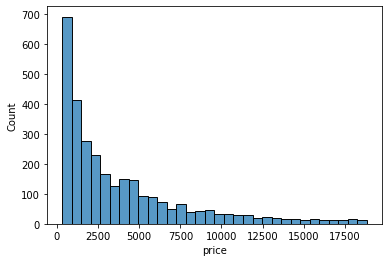

In [9]:
sns.histplot(x=sample["price"]);

Histograms only work on numeric variables. They divide the data into an arbitrary number of equal sized bins and displays how many diamonds go into each bin. So, interpreting the above histogram, we can approximate that there are about 800 diamonds which are priced between 0 and 1000 (looking at the first bin or bar). 

Here, each bin contains the count of diamonds, which might not be what we want. Instead of seeing counts of diamond in each bin, we might want to see what percentage of the diamonds falls into bin. For that, we will set the `stat` argument of the `histplot` function to `percent`:

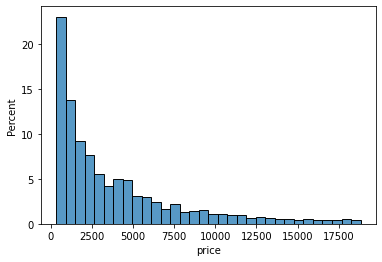

In [10]:
sns.histplot(sample["price"], stat="percent");

Now, the height of each bar/bin shows the percentage of the diamonds. It is confirmed by the label of the Y Axis - which says "Percent".

Let's do the same for the carat of the diamonds:

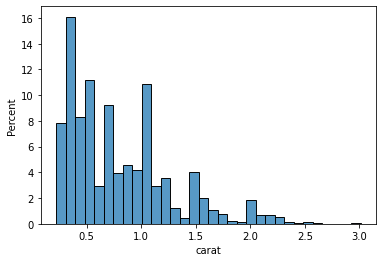

In [11]:
sns.histplot(sample["carat"], stat="percent");

Looking at the first few bars, we can conclude that the majority of the diamonds weight less than 0.5 carats. The aim of histograms is to take a numeric variable and show what it generally looks like. The statisticians call it looking at the *distribution* of a variable.

However, histograms aren't the only plots that does the job. There is also a plot called KDE Plot (Kernel Density Estimate), which uses some fancy math under the hood to draw curves like this:

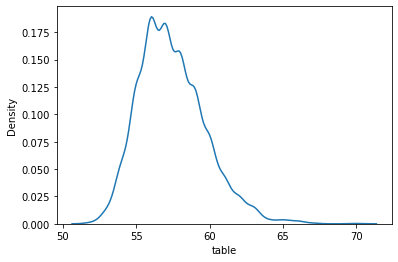

In [12]:
sns.kdeplot(sample["table"]);

Plotting the KDE plot of the table variable shows us that the majority of diamonds measure between 55.0 and 60.0. At this point, I will leave it to you to plot the KDEs and histograms of other numeric variables because we have to move on to categorical features.

The most common plot for categorical features is a `countplot`. Passing the name of a categorical feature in our dataset to Seaborn's `countplot` draws a bar chart with each bar height representing the number of diamonds in each category. Below is a countplot of diamond cuts:

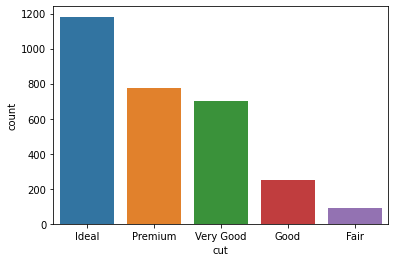

In [13]:
sns.countplot(sample["cut"]);

We can see that our dataset is made up of much more ideal diamonds than premium or very good diamonds. Here is a countplot of diamond colors for the interested:

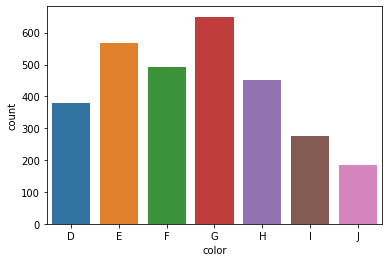

In [14]:
sns.countplot(sample["color"]);

This concludes our univarite analysis section of the EDA.

# Bivariate analysis

Now, things will be more interesting because we will look at the relationships between two variables at a time. Let's start by looking at the connection between diamond carats and price. We already know that diamonds with higher carats cost more. Let's see if we can visually capture this trend:

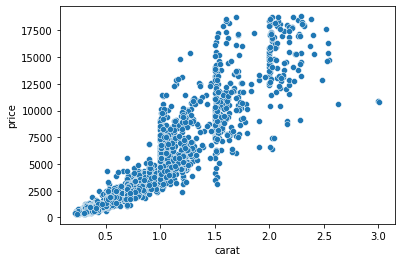

In [15]:
sns.scatterplot(x=sample["carat"], y=sample["price"]);

Here, we are using another Seaborn function that plots a scatterplot. Scatterplots are one of the most widely-used charts because they show the relationships between two variables very accurately by using a cloud of dots. 

Above, each dot represents a single diamond and their position is determined by their carat and price measurements, which we passed to `x` and `y` parameters of the `scatterplot` function. And the plot confirms our assumptions - heavier diamonds do tend to be more expensive. We are drawing this conclusion based on the curvy upward trend of the dots. 

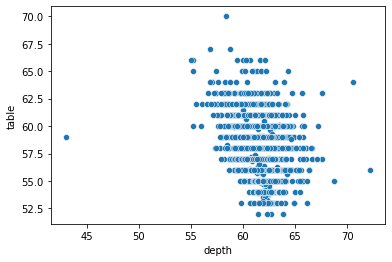

In [16]:
sns.scatterplot(x=sample["depth"], y=sample["table"]);

Now, we are plotting depth against table. Frankly, this scatterplot is a bit disappointing because we can't draw a tangible conclusion like we did with the previous one. Well, what can we say? You gotta work with what you have. Let's move on.


Another common bivariate plot is a boxplot and we will see why it is named so in a minute. Boxplots plot the distribution of a variable against another based on their 5 number summary:

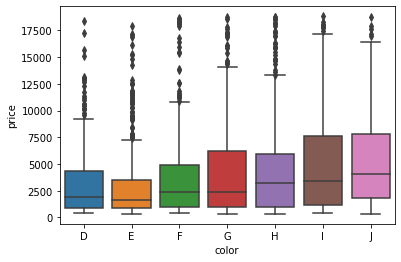

In [17]:
sns.boxplot(x=sample["color"], y=sample["price"]);

The boxplot above shows the relationship between each color category and their respective prices. The horizontal vertices at the bottom and top of each vertical line of a box represents the minimum and maximum values that category. The edges of the boxes, specifically, the bottom and top edges represent the 25th and 75th percentiles. 

In other words, the bottom edge of the *first* box tells us that 25% of D colored diamonds cost less than about 1250 dollars while the top edge says that 75% of diamonds cost less than about 4500 dollars. The little horizontal line in the middle denotes the median - the 50% mark. 

The dark dots above are called outliers. These are the datapoints which are considered unusual or far from the rest of the observations. We won't go into the detail of how they are calculated exactly, but you can read more about them [here](https://en.wikipedia.org/wiki/Outlier#:~:text=In%20statistics%2C%20an%20outlier%20is,serious%20problems%20in%20statistical%20analyses.). 

Let's plot a boxplot of diamond clarities and their relationship with carat:

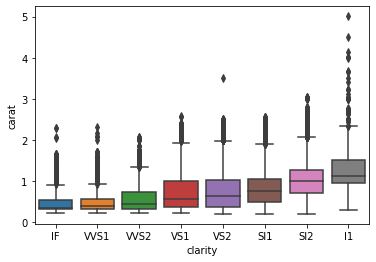

In [18]:
sns.boxplot(diamonds["clarity"], diamonds["carat"]);

Here we see an interesting trend. The diamond clarities are displayed from best to worst and we can see that lower clarity diamonds tend to weigh more in the dataset. The last box shows that the lowest clarity (l1) diamonds weigh a carat on average.

Once again, I'll leave it to you to explore other bivariate relationships in the dataset.

# Multivariate analysis

Finally, it is time to look at multiple variables at the same time. The most common multivariate plot you will encounter is a pairplot of Seaborn. Pairplots take a number of numeric variables and plot every single combination of them against each other. Below, we are creating a pairplot of price, carat, table and depth features to keep things manageable:

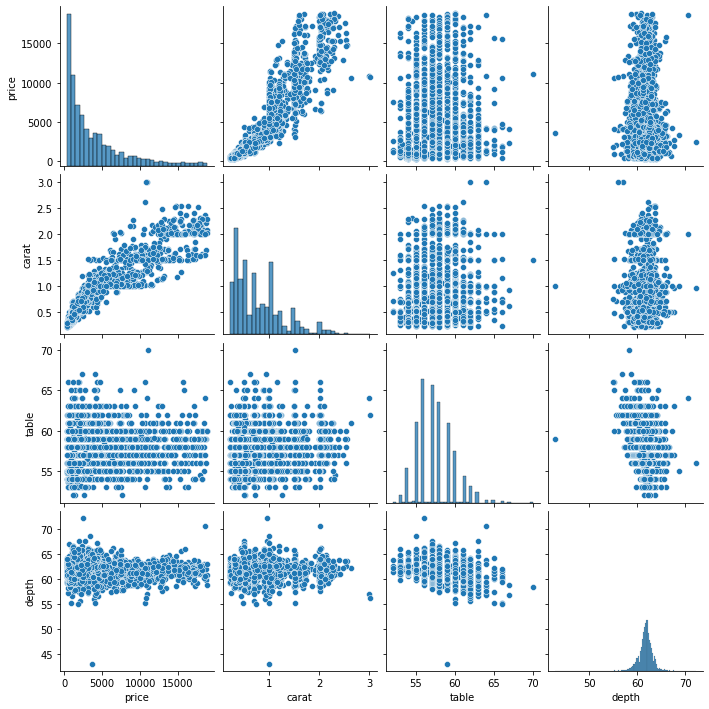

In [19]:
sns.pairplot(sample[["price", "carat", "table", "depth"]]);

As you can see, every single variable is plotted against others, resulting in plot doubles across the diagonal. The diagonal itself contains histograms because each diagonal is a variable plotted against itself. A pairplot is simply a compact and single-line version of creating multiple scatterplots and histograms at the same time. 

So far, we have solely relied on our visual intuition to decipher the relationships between different features. However, many analysts and statisticians require mathematical or statistical methods that quantify these relationships to back our "eyeball estimates". One of these statistical methods is computing a correlation coefficient between features.

[Correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), often denoted as *R* is a measure of how strongly a numeric variable is *linearly* connected to another. It ranges from -1 to 1 and values close to the range limits denote strong relationships. In other words, if the absolute value of the coefficient is between 0 and 0.3, it is considered a weak (or no) relationship. If it is between 0.3-0.7, the strength of the relationship is considered moderate while >0.7 correlation represents a quite strong connection. 

Pandas makes it easy to compute the correlation coefficient between every single feature pair. By calling the `corr` method on our dataframe, we get a correlation matrix:

In [20]:
correlation_matrix = diamonds.corr()

correlation_matrix

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [21]:
correlation_matrix.shape

(7, 7)

Looking closely, we see a diagonal of 1s. These are perfect relationships because the diagonal contains the correlation between a feature and itself. 

However, looking at the raw correlation matrix is not fun and doesn't reveal much. Once again, we will use another Seaborn plot called a **heatmap**:

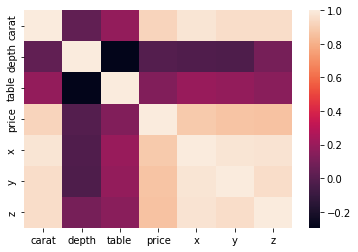

In [22]:
sns.heatmap(correlation_matrix);

Passing our correlation matrix to the `heatmap` function displays a plot which colors each cell of the correlation matrix based on its magnitude. The colorbar at the right serves as a legend of what shades of color denotes which magnitudes. 

But, we can do much better. Instead of leaving the audience guessing the numbers, we can annotate the heatmap so that each cell contains its magnitude:

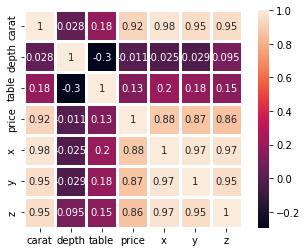

In [23]:
sns.heatmap(correlation_matrix, square=True, annot=True, linewidths=3);

For this, we set the `annot` to True, which displays the original correlation on the plot. We also set `square` to True to make the heatmap square-shaped and thus, more visually appealing. We also increased the line widths so that each cell in the heatmap is more distinct. 

Interpreting this heatmap, we can learn that the strongest relations are among the `x`, `y` and `z` features. They all have >0.8 correlation among themselves. We also see that the table and depth are negatively correlated but weakly. We can also confirm our assumptions from the scatterplots - the correlation between carat and price is quite strong - 0.92. 

Another approach we can use to explore multivariate relationships is, again, to use scatterplots with more variables. Take a look at the one below:

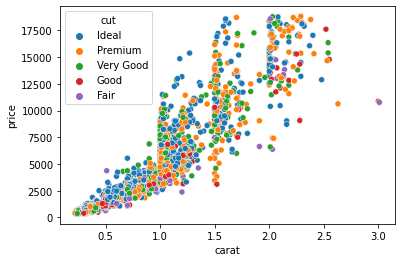

In [24]:
sns.scatterplot(sample["carat"], sample["price"], hue=sample["cut"]);

Now, each dot is colored based on their cut category. We achieved this by passing the cut column to the `hue` parameter of the `scatterplot` function. We can pass numeric variables to `hue` as well:

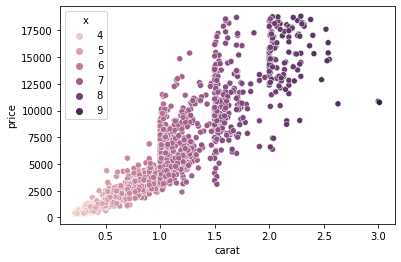

In [25]:
sns.scatterplot(sample["carat"], sample["price"], hue=sample["x"]);

In the above example, we are plotting carat against price and coloring each diamond based on their width. Here we can make two observations:

1. Heavier diamonds cost more and
2. Heavier diamonds are also wider, which makes sense.

Instead of encoding a third variable with color, we could have increased the dot size:

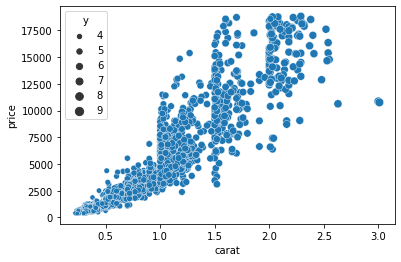

In [26]:
sns.scatterplot(sample["carat"], sample["price"], size=sample["y"]);

This time, we passed the `y` variable to the `size` argument, which scales the size of the dots based on the magnitude of `y` for each diamond. Finally, we can plot four variables at the same time by passing columns to both `hue` and `size`:

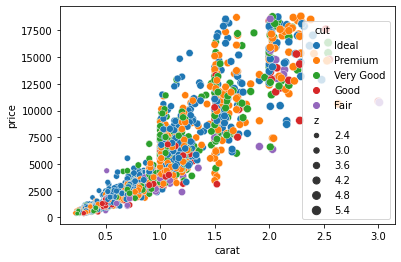

In [27]:
sns.scatterplot(sample["carat"], sample["price"], hue=sample["cut"], size=sample["z"]);

Now the plot encodes the diamond cut categories as color and their depth as size of the dots. 

# Differences between Matplotlib and Seaborn - which one to choose?

Up to this point, we have used Seaborn exclusively, even though the title of the article included Matplotlib. So, why?

The first reason is simplicity. As Seaborn was built on top of Matplotlib, it was designed to compliment the weaknesses of Matplotlib, making it more user-friendly. 

Another major reason is the default styles of plots. By default, Seaborn creates more "easy on the eye" plots. On the other hand, the default styles of Matplotlib plots, well, suck. For example, here is the same histogram of diamond prices:

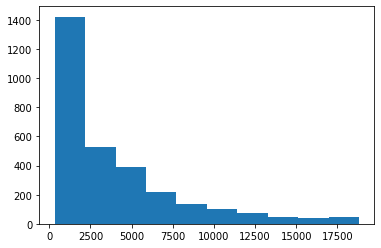

In [28]:
fig, ax = plt.subplots()

ax.hist(sample["price"]);

It is majorly different than the one of Seaborn. While Seaborn finds the optimal number of bins automatically, Matplotlib always uses 10 bins (though you can change it manually). Another example is the carat vs. price scatterplot:

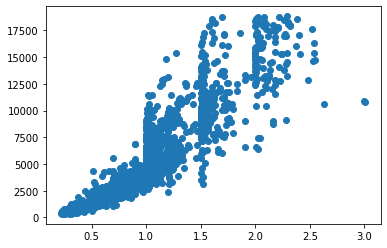

In [29]:
fig, ax = plt.subplots()

ax.scatter(sample["carat"], sample["price"]);

It is generally agreed that Seaborn suits beginners more. You can create much more beautiful charts using less code. However, the key to a masterpiece visual is in the customization.

That's where Matplotlib really shines. Though it has a steeper learning curve, once you master it, you can create jaw-dropping visuals such as [these](https://ibexorigin.medium.com/yes-these-unbelievable-masterpieces-are-created-with-matplotlib-2256a4c54b12). 

# Subplotting with Seaborn

Before we wrap the article, I want to show a few more complex visuals you can create with Seaborn. Specifically, we will talk about subplotting. 

We have already seen an example of subplots when we used the `pairplot` function:

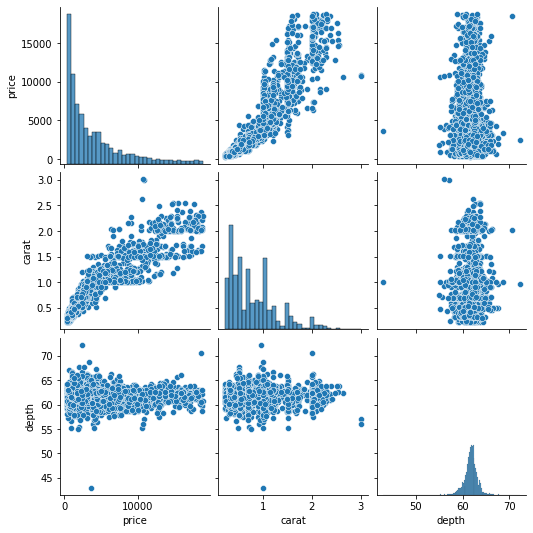

In [36]:
g = sns.pairplot(sample[["price", "carat", "depth"]])

In [32]:
type(g)

seaborn.axisgrid.PairGrid

The `pairplot` function is a shorthand to create a set of subplots called a `PairGrid`. Fortunately, we are not just limited to the `pairplot` function. We can create custom `PairGrid`s:

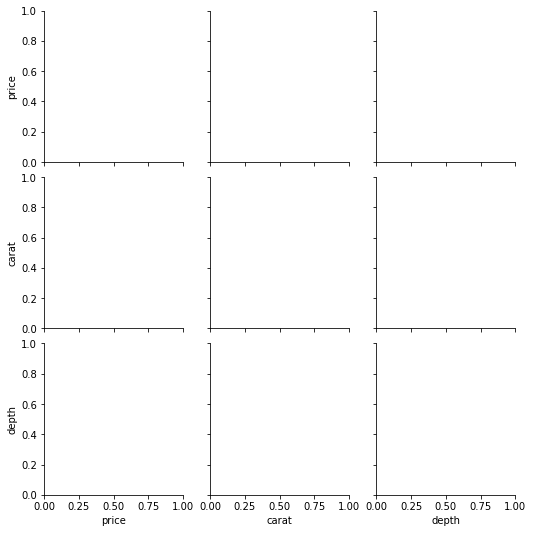

In [35]:
g = sns.PairGrid(sample[["price", "carat", "depth"]])

Passing a dataframe to the `PairGrid` class returns a set of empty subplots like above. Now, we will use the `map` function to populate each subplot:

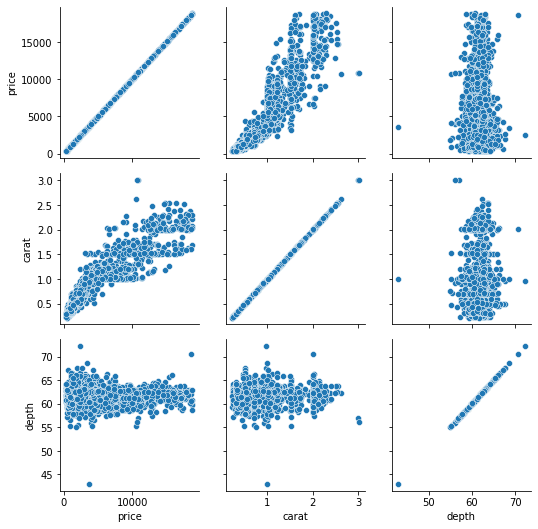

In [39]:
g = sns.PairGrid(sample[["price", "carat", "depth"]])
g.map(sns.scatterplot);

`map` accepts a name of a Seaborn plotting function and applies it to all subplots. Here, we don't need scatterplots in the diagonal, so we can populate it with histograms:

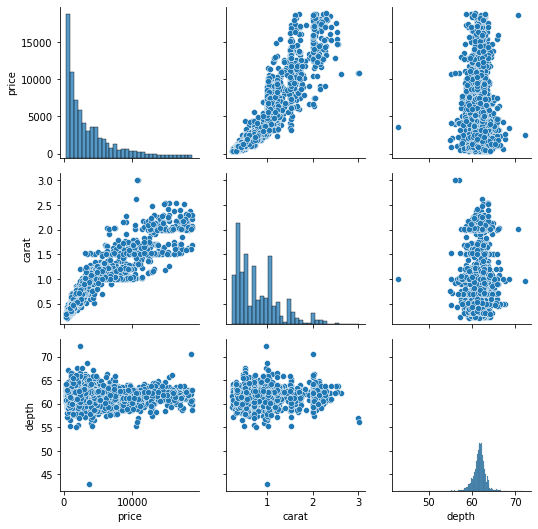

In [42]:
g = sns.PairGrid(sample[["price", "carat", "depth"]])
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot);

Using the `map_offdiag` and `map_diag` functions, we ended up with the exact same result of `pairplot`. But we can improve the above chart even further. For example, we can plot different plots in the upper and lower triangles using `map_lower` and `map_upper`:

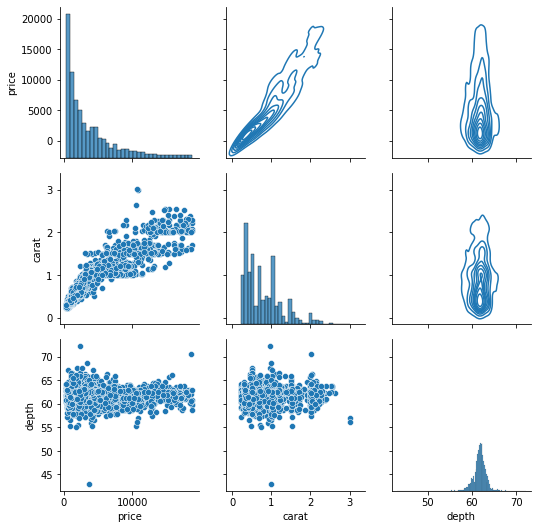

In [44]:
g = sns.PairGrid(sample[["price", "carat", "depth"]])
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

g.map_diag(sns.histplot);

The upper triangle KDE Plots turn into [contours](https://en.wikipedia.org/wiki/Contour_line) because of their 2D nature. 

Finally, we can also use the `hue` parameter to encode a third variable in every subplot:

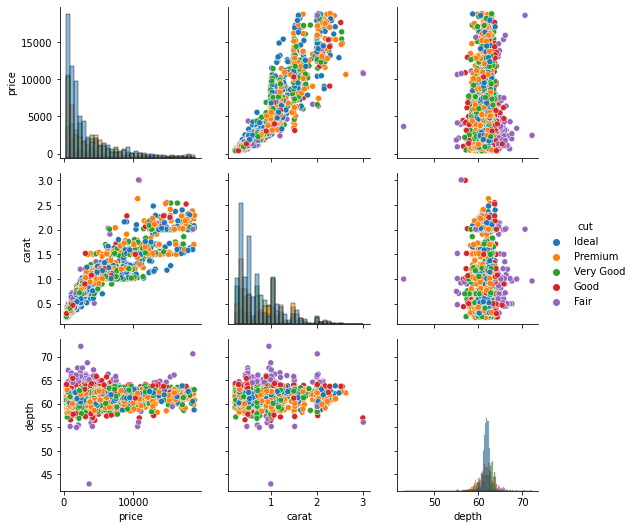

In [46]:
g = sns.PairGrid(sample[["price", "carat", "depth", "cut"]], hue="cut")

g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend();

The `hue` parameter is specified while calling the `PairGrid` class. At the end, we are also calling the `add_legend` function on the grid to make the legend visible. 

But, here is a problem with the above subplots. The dots are completely overplotted and as a result, we can't reasonable distinguish any patterns between each diamond cut. 

To solve this, we can use a different set of subplots called a `FacetGrid`. A `FacetGrid` can be created just like a `PairGrid` but with different parameters:

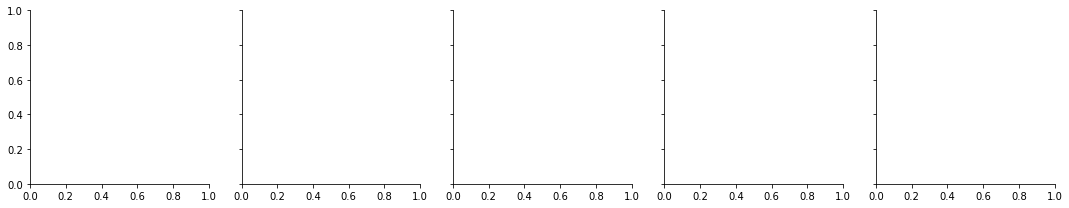

In [48]:
g = sns.FacetGrid(sample, col="cut")

Passing the `cut` column to `col` parameter creates a FacetGrid with 5 subplots, one for each diamond cut category. Let's populate them with `map`:

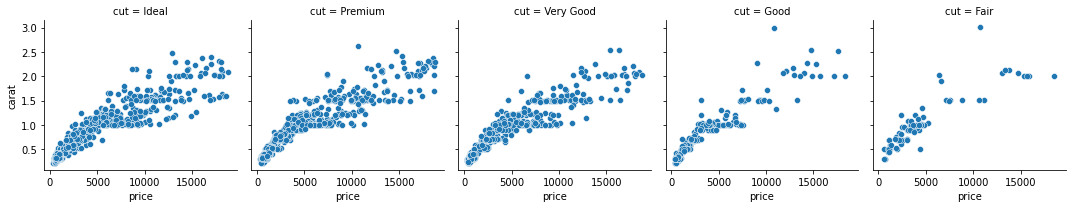

In [50]:
g = sns.FacetGrid(sample, col="cut")

g.map(sns.scatterplot, "price", "carat");

This time, we have separate scatterplots in separate subplots for each diamond cut category. As you can see, FacetGrid is smart enough to put the relevant axis labels as well. 

We can also introduce another categorical variable as a row:

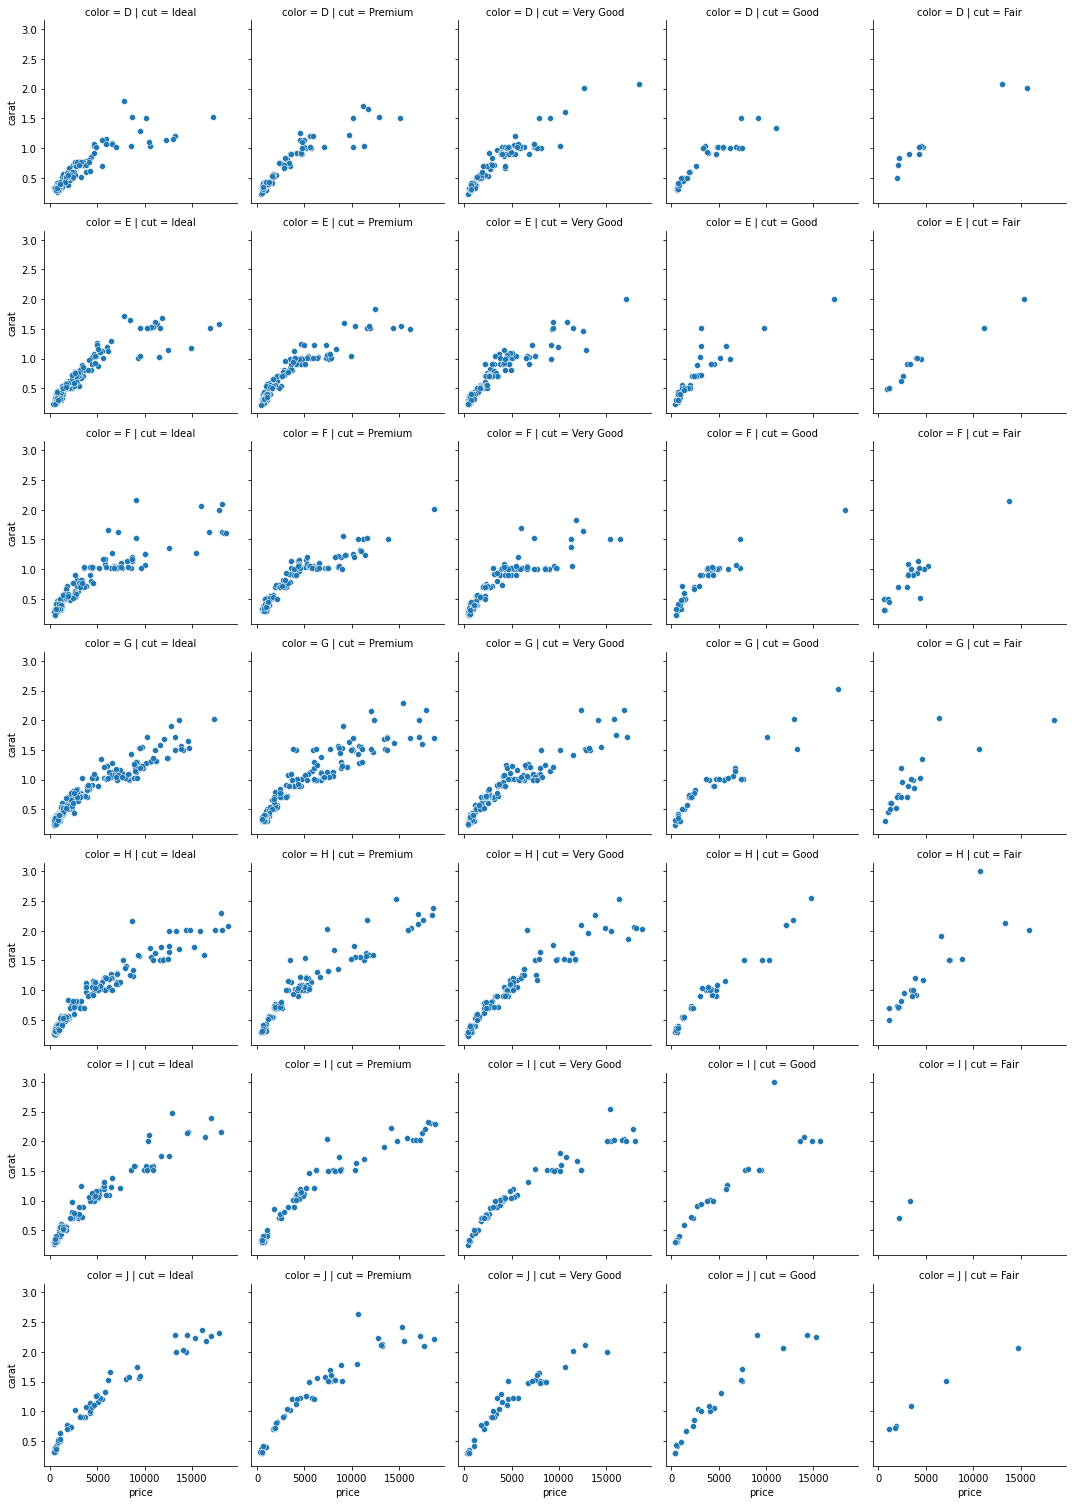

In [51]:
g = sns.FacetGrid(sample, col="cut", row="color")

g.map(sns.scatterplot, "price", "carat");

The resulting plot is humongous because there is a subplot for every diamond cut/color combination. 

There are many other ways you can customize these [FacetGrids](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) and [PairGrids](https://seaborn.pydata.org/generated/seaborn.PairGrid.html). I suggest reading the docs to learn more about them. 

 # Summary

This tutorial only served as a glimpse of what a real-world EDA might look. Even though we learned about many different types of plots, there are still more. Besides, we have only scratched the surface of all the things you can learn from today's dataset. In other words, you still can go deeper and answer some other interesting questions about the dataset. One example to lead the way would be "Why some diamonds are still cheap even though they weigh much more".

Regarding the libraries, the next steps would be learning each introduced plot function in-depth. Each of them have many parameters and reading the documentation and trying out the examples should be enough to satisfy your needs to plot finer charts. I also recommend reading the [Matplotlib documentation](https://matplotlib.org/stable/index.html) to learn about more advanced methods in data visualization. Thank you for reading!